# Import Libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import HTML as html_print
from termcolor import colored
from IPython.display import display

import warnings

# Connect to Google Drive

In [ ]:
from google.colab import drive, files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Datasets

In [ ]:
df_1_Generation = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Plant_1_Generation_Data.csv")
df_1_Weather = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Plant_1_Weather_Sensor_Data.csv")

# Exploratory Data Analaysis

In [ ]:

def display_head_and_tail(dataframe, head=5):
  display(dataframe.head(head).style.set_caption("Head"))
  display(dataframe.tail(head).style.set_caption("Tail"))

def display_na(dataframe):
  na_df = dataframe.isnull().sum().reset_index()
  na_df.columns = ['Column', 'Number of NA']
  display(na_df.style.set_caption("Number of NA Values"))

def display_quantiles(dataframe):
  quantiles_df = dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T
  display(quantiles_df.style.format("{:.2f}").set_caption("Quantiles"))

def display_column_types(dataframe):
  # Get the data types of each column
  column_types = dataframe.dtypes
  print("Data types of each column:")
  print(column_types)

def display_min_max_values_of_columns(dataframe):
  max_values = dataframe.max(axis=0)
  print("Maximum values for each column:")
  print(max_values)
  min_values = dataframe.min(axis=0)
  print("Minimum values for each column:")
  print(min_values)

def check_df(dataframe, head=5):
  print('Shape')
  print(dataframe.shape)
  print('Types')
  display_column_types(dataframe)
  print('Head & Tail')
  display_head_and_tail(dataframe, head)
  print('NA Values')
  display_na(dataframe)
  display_min_max_values_of_columns(dataframe)

In [ ]:
check_df(df_1_Weather)

Shape
(3182, 6)
Types
Data types of each column:
DATE_TIME               object
PLANT_ID                 int64
SOURCE_KEY              object
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
dtype: object
Head & Tail


NA Values


Maximum values for each column:
DATE_TIME              2020-06-17 23:45:00
PLANT_ID                           4135001
SOURCE_KEY                 HmiyD2TTLFNqkNe
AMBIENT_TEMPERATURE              35.252486
MODULE_TEMPERATURE               65.545714
IRRADIATION                       1.221652
dtype: object
Minimum values for each column:
DATE_TIME              2020-05-15 00:00:00
PLANT_ID                           4135001
SOURCE_KEY                 HmiyD2TTLFNqkNe
AMBIENT_TEMPERATURE              20.398505
MODULE_TEMPERATURE               18.140415
IRRADIATION                            0.0
dtype: object


In [ ]:
df_1_Generation['DATE_TIME'] = pd.to_datetime(df_1_Generation['DATE_TIME'], format='%d-%m-%Y %H:%M')

df_1_Weather['DATE_TIME'] = pd.to_datetime(df_1_Weather['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

## Plant 1 Analysis

In [ ]:
check_df(df_1_Generation)

Shape
(68778, 7)
Types
Data types of each column:
DATE_TIME      datetime64[ns]
PLANT_ID                int64
SOURCE_KEY             object
DC_POWER              float64
AC_POWER              float64
DAILY_YIELD           float64
TOTAL_YIELD           float64
dtype: object
Head & Tail


NA Values


Maximum values for each column:
DATE_TIME      2020-06-17 23:45:00
PLANT_ID                   4135001
SOURCE_KEY         zVJPv84UY57bAof
DC_POWER                 14471.125
AC_POWER                   1410.95
DAILY_YIELD                 9163.0
TOTAL_YIELD              7846821.0
dtype: object
Minimum values for each column:
DATE_TIME      2020-05-15 00:00:00
PLANT_ID                   4135001
SOURCE_KEY         1BY6WEcLGh8j5v7
DC_POWER                       0.0
AC_POWER                       0.0
DAILY_YIELD                    0.0
TOTAL_YIELD              6183645.0
dtype: object


In [ ]:
check_df(df_1_Weather)

Shape
(3182, 6)
Types
Data types of each column:
DATE_TIME              datetime64[ns]
PLANT_ID                        int64
SOURCE_KEY                     object
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
dtype: object
Head & Tail


NA Values


Maximum values for each column:
DATE_TIME              2020-06-17 23:45:00
PLANT_ID                           4135001
SOURCE_KEY                 HmiyD2TTLFNqkNe
AMBIENT_TEMPERATURE              35.252486
MODULE_TEMPERATURE               65.545714
IRRADIATION                       1.221652
dtype: object
Minimum values for each column:
DATE_TIME              2020-05-15 00:00:00
PLANT_ID                           4135001
SOURCE_KEY                 HmiyD2TTLFNqkNe
AMBIENT_TEMPERATURE              20.398505
MODULE_TEMPERATURE               18.140415
IRRADIATION                            0.0
dtype: object


In [ ]:
df_plant_1 = pd.merge(df_1_Generation, df_1_Weather, on=['PLANT_ID','DATE_TIME', 'SOURCE_KEY'], how='outer')

In [ ]:
df_plant_1

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0     2020-05-15 00:00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1     2020-05-15 00:00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2     2020-05-15 00:00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3     2020-05-15 00:00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4     2020-05-15 00:00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                   ...       ...              ...       ...       ...   
71955 2020-06-17 22:45:00   4135001  HmiyD2TTLFNqkNe       NaN       NaN   
71956 2020-06-17 23:00:00   4135001  HmiyD2TTLFNqkNe       NaN       NaN   
71957 2020-06-17 23:15:00   4135001  HmiyD2TTLFNqkNe       NaN       NaN   
71958 2020-06-17 23:30:00   4135001  HmiyD2TTLFNqkNe       NaN       NaN   
71959 2020-06-17 23:45:00   4135001  HmiyD2TTLFNqkNe       NaN       NaN   

       DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0              0.0    6259559.0                  NaN                 NaN   
1              0.0    6183645.0                  NaN                 NaN   
2              0.0    6987759.0                  NaN                 NaN   
3              0.0    7602960.0                  NaN                 NaN   
4              0.0    7158964.0                  NaN                 NaN   
...            ...          ...                  ...                 ...   
71955          NaN          NaN            22.150570           21.480377   
71956          NaN          NaN            22.129816           21.389024   
71957          NaN          NaN            22.008275           20.709211   
71958          NaN          NaN            21.969495           20.734963   
71959          NaN          NaN            21.909288           20.427972   

       IRRADIATION  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
71955          0.0  
71956          0.0  
71957          0.0  
71958          0.0  
71959          0.0  

[71960 rows x 10 columns]

In [ ]:
non_null_rows = df_plant_1[(df_plant_1['DC_POWER'].notnull()) & (df_plant_1['MODULE_TEMPERATURE'].notnull())]

In [ ]:
non_null_rows

Empty DataFrame
Columns: [DATE_TIME, PLANT_ID, SOURCE_KEY, DC_POWER, AC_POWER, DAILY_YIELD, TOTAL_YIELD, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, IRRADIATION]
Index: []

## Generation Analysis

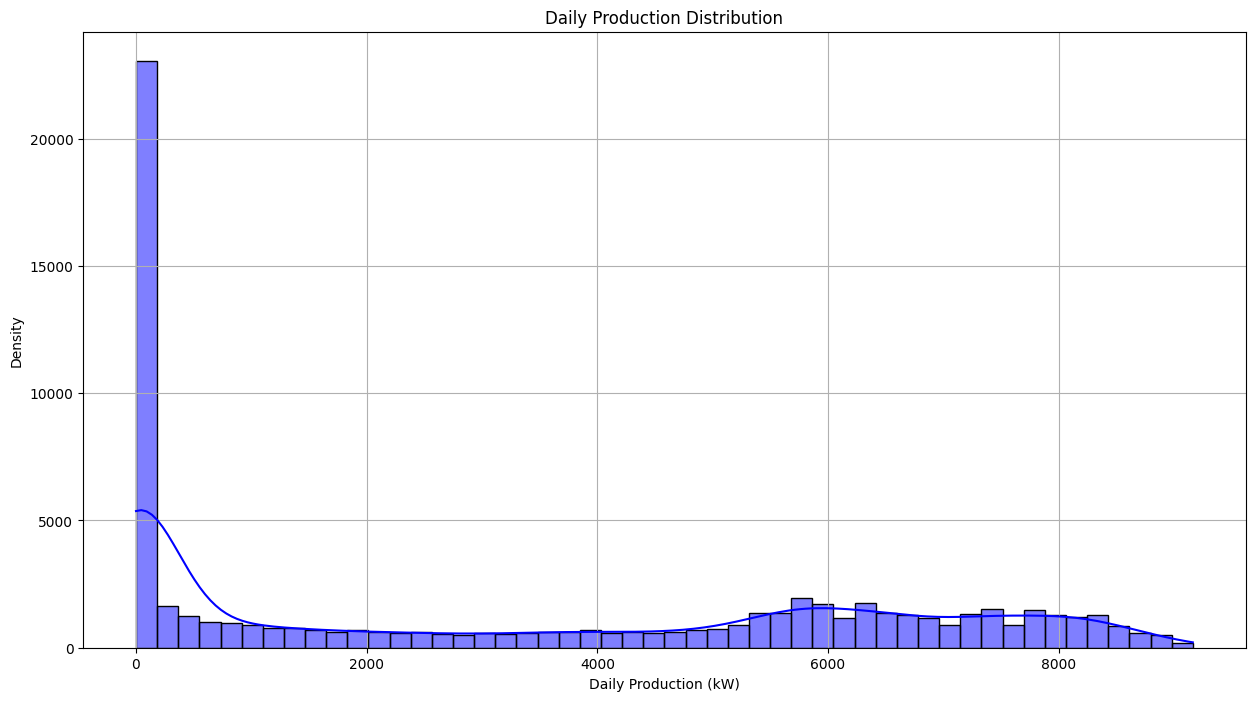

In [ ]:
# Daily Production Distribution
plt.figure(figsize=(15,8))
sns.histplot(df_1_Generation['DAILY_YIELD'], bins=50, color='blue', kde=True)
plt.title('Daily Production Distribution')
plt.xlabel('Daily Production (kW)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

<ipython-input-18-7794465b65f7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_1_Generation['SOURCE_KEY'], y=df_1_Generation['DAILY_YIELD'], palette="Blues")


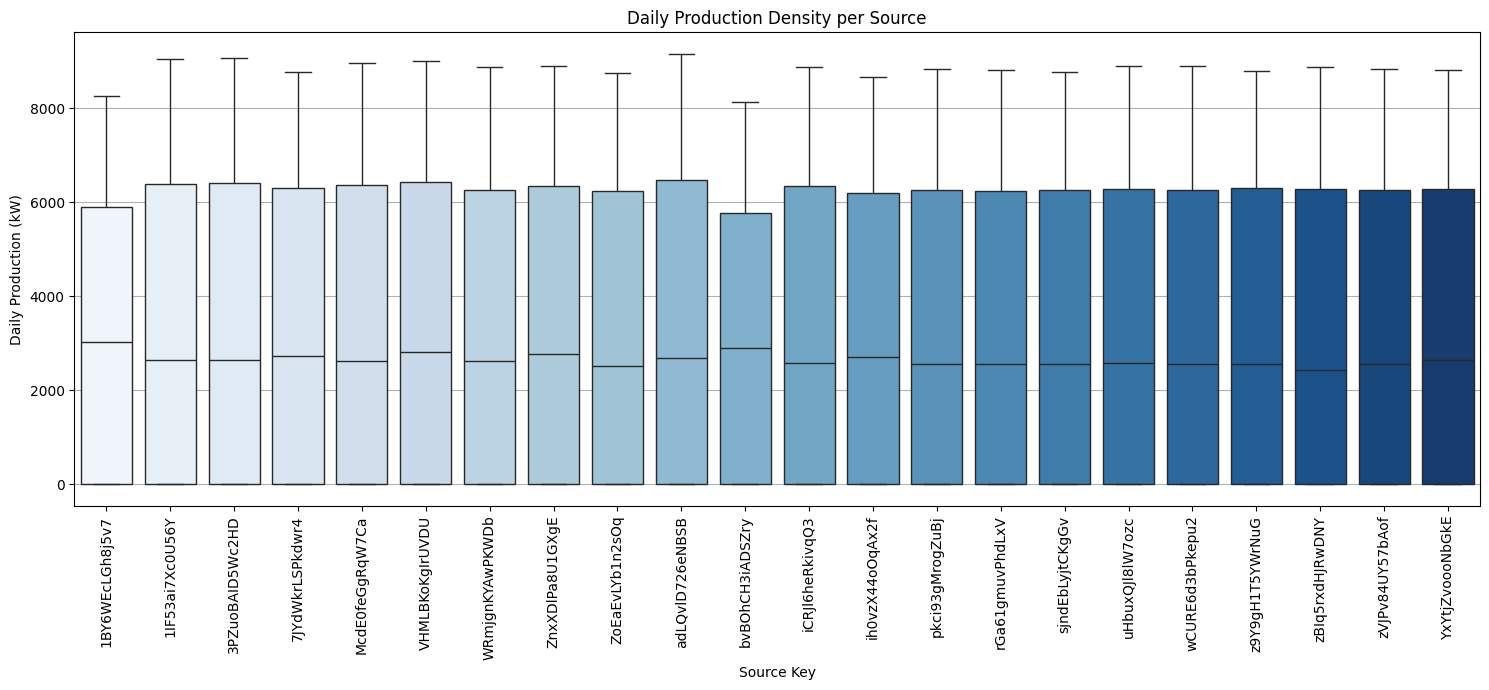

In [ ]:
# Daily Production Density per Source
plt.figure(figsize=(15,7))
sns.boxplot(x=df_1_Generation['SOURCE_KEY'], y=df_1_Generation['DAILY_YIELD'], palette="Blues")
plt.xticks(rotation=90)
plt.title('Daily Production Density per Source')
plt.xlabel('Source Key')
plt.ylabel('Daily Production (kW)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
print("Unique Hours")
print(df_1_Generation['DATE_TIME'].dt.hour.unique())

print("Unique Months")
print(df_1_Generation['DATE_TIME'].dt.month.unique())

print("Unique Years")
print(df_1_Generation['DATE_TIME'].dt.year.unique())

Unique Hours
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique Months
[5 6]
Unique Years
[2020]


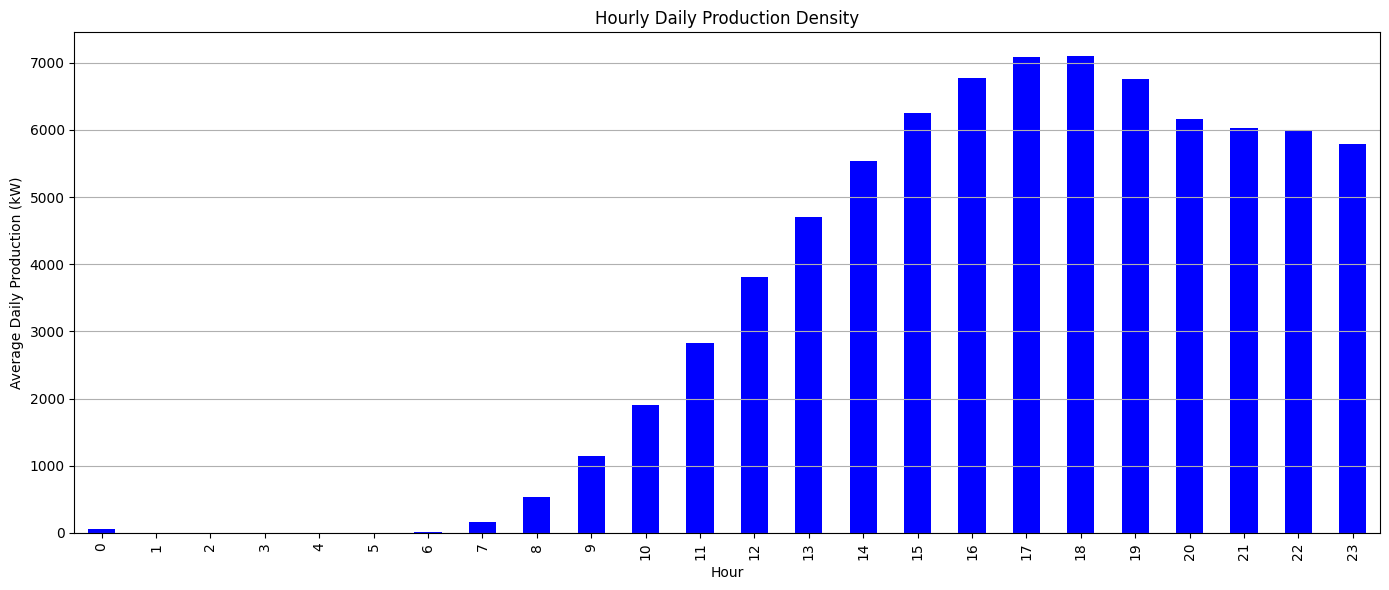

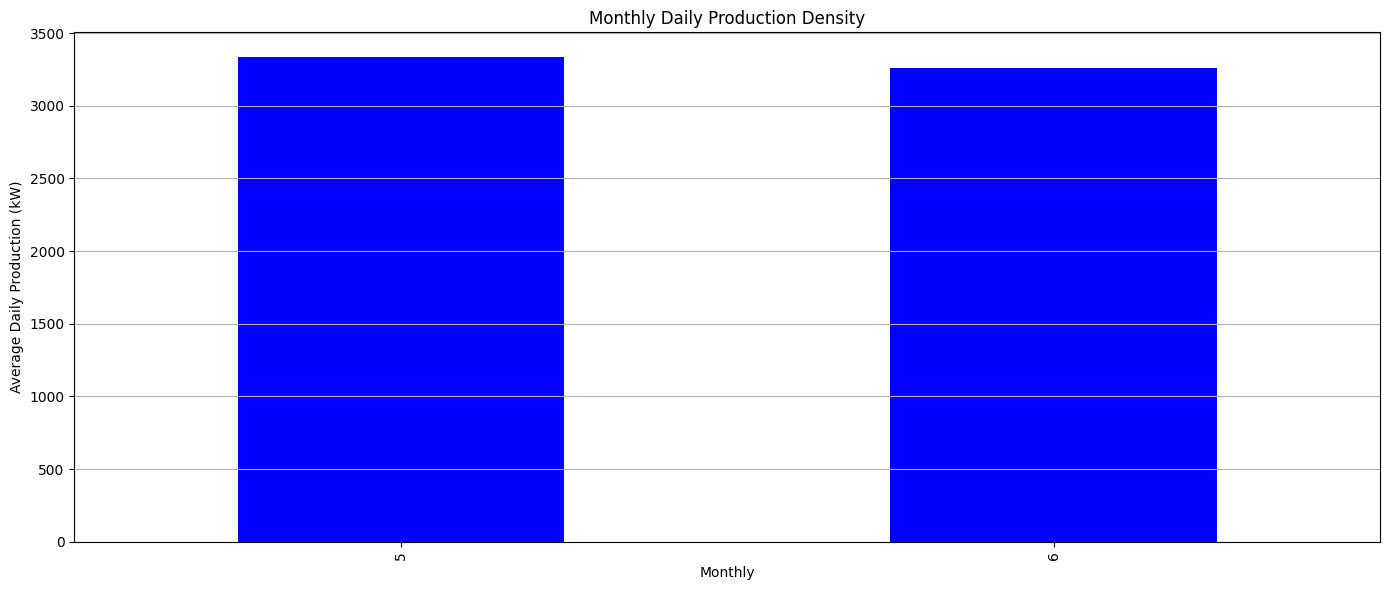

In [ ]:
# Hourly Daily Production Density
hourly_yield = df_1_Generation.groupby(df_1_Generation['DATE_TIME'].dt.hour)['DAILY_YIELD'].mean()

plt.figure(figsize=(14,6))
hourly_yield.plot(kind='bar', color='blue')
plt.title('Hourly Daily Production Density')
plt.xlabel('Hour')
plt.ylabel('Average Daily Production (kW)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Monthly Daily Production Density
hourly_yield = df_1_Generation.groupby(df_1_Generation['DATE_TIME'].dt.month)['DAILY_YIELD'].mean()

plt.figure(figsize=(14,6))
hourly_yield.plot(kind='bar', color='blue')
plt.title('Monthly Daily Production Density')
plt.xlabel('Monthly')
plt.ylabel('Average Daily Production (kW)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

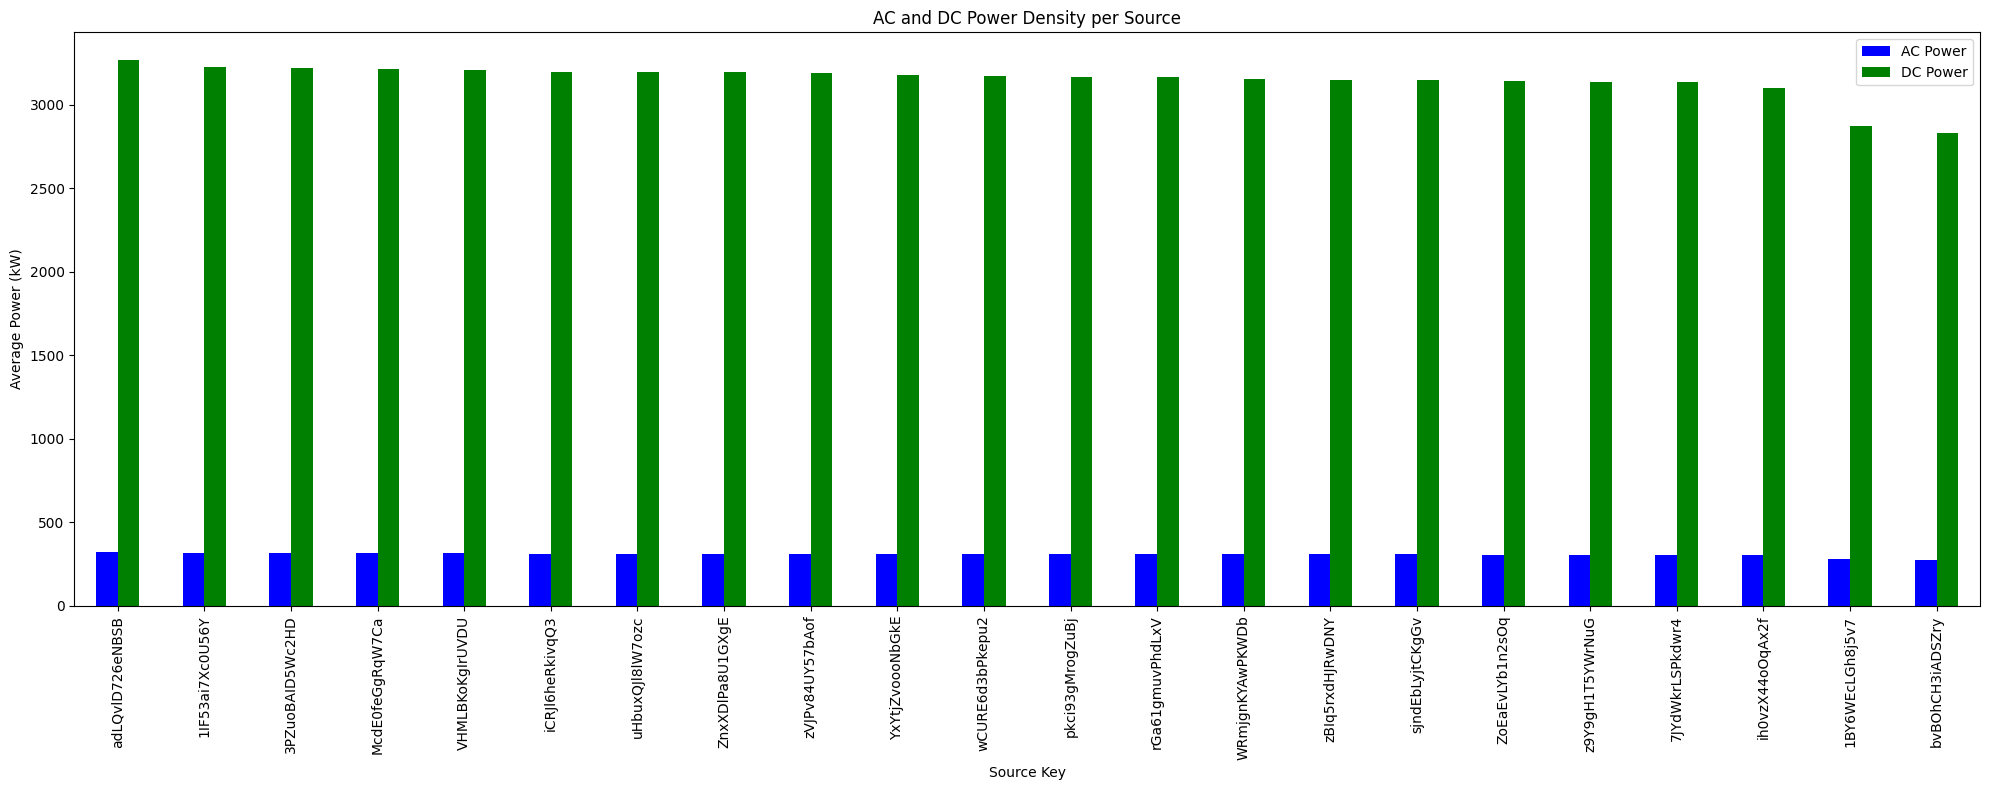

In [ ]:
#  AC and DC Power Density per Source
grouped = df_1_Generation.groupby('SOURCE_KEY').mean(numeric_only=True)[['AC_POWER', 'DC_POWER']]

grouped.sort_values(by='AC_POWER', ascending=False).plot(kind='bar', stacked=False, figsize=(20,8), color=['blue', 'green'])
plt.title('AC and DC Power Density per Source')
plt.xlabel('Source Key')
plt.ylabel('Average Power (kW)')
plt.xticks(rotation=90)
plt.legend(['AC Power', 'DC Power'])
plt.tight_layout()
plt.show()

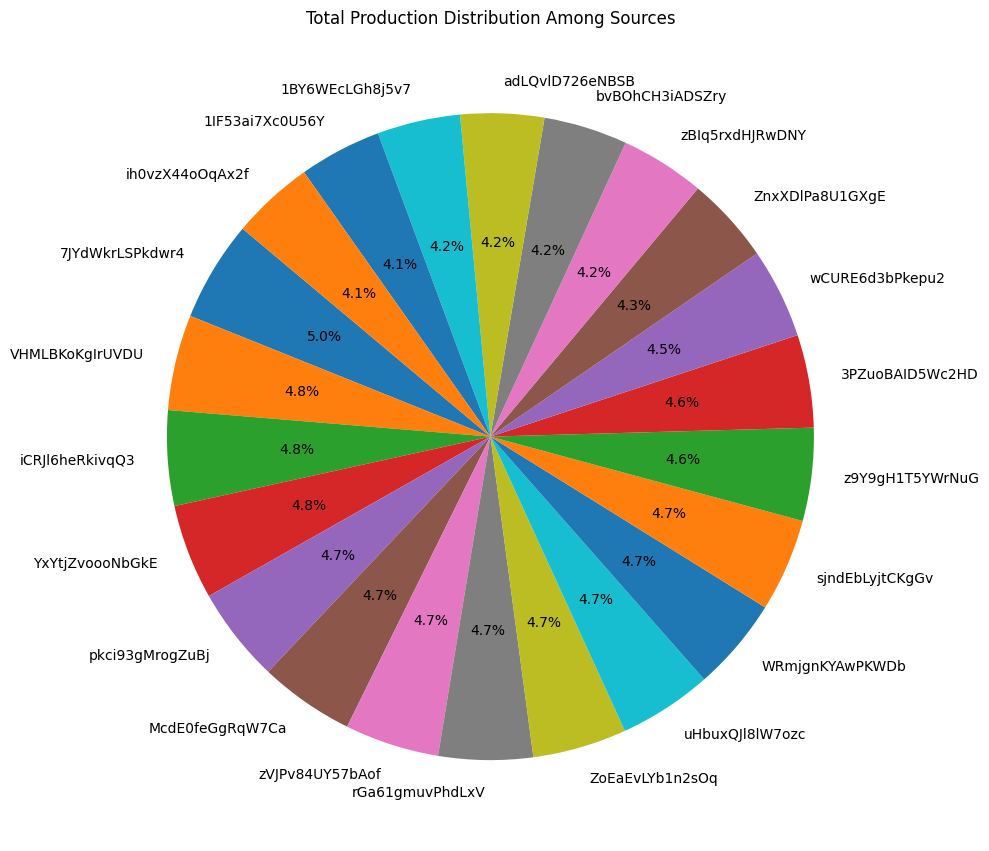

In [ ]:
# Total Production Distribution Among Sources
grouped_total_yield = df_1_Generation.groupby('SOURCE_KEY')['TOTAL_YIELD'].last()

plt.figure(figsize=(10,10))
grouped_total_yield.sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Production Distribution Among Sources')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
# AC Power per Source
import plotly.express as px

fig = px.scatter(df_1_Generation, x="SOURCE_KEY", y="AC_POWER", animation_frame=df_1_Generation['DATE_TIME'].dt.hour,
                 range_y=[df_1_Generation['AC_POWER'].min(), df_1_Generation['AC_POWER'].max()],
                 title="Change in AC Power over Time")

fig.show()

In [ ]:
# DC Power per Source
import plotly.express as px

fig = px.scatter(df_1_Generation, x="SOURCE_KEY", y="DC_POWER", animation_frame=df_1_Generation['DATE_TIME'].dt.hour,
                 range_y=[df_1_Generation['DC_POWER'].min(), df_1_Generation['DC_POWER'].max()],
                 title="Change in DC Power over Time")

fig.show()

In [ ]:
# Daily Yield
import plotly.express as px

import plotly.graph_objects as go

fig = go.Figure()

df_gen = df_1_Generation.groupby('DATE_TIME').sum(numeric_only=True).reset_index()

df_gen['hour'] = df_gen['DATE_TIME'].dt.hour

fig.add_trace(go.Scatter(
    x=df_gen['DATE_TIME'],
    y=df_gen['DAILY_YIELD'],
    mode='lines+markers',
    name='Daily Yield',
    line=dict(color='darkblue', width=3),
    marker=dict(size=8, color=df_gen['DAILY_YIELD'], colorscale='Viridis', showscale=True),
    fill='tozeroy',
    fillcolor='rgba(100, 150, 250, 0.1)'
))

fig.update_layout(
    plot_bgcolor="white",
    title={
        'text': "Daily Yield",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Date",
    yaxis_title="Daily Yield (kW)",
    title_font=dict(size=26, family="Arial", color="black"),
    xaxis_title_font=dict(size=20, family="Arial", color="grey"),
    yaxis_title_font=dict(size=20, family="Arial", color="grey"),
    xaxis_tickfont=dict(size=14, family="Arial", color="grey"),
    yaxis_tickfont=dict(size=14, family="Arial", color="grey"),
    hovermode="x",
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Arial"),
    xaxis=dict(tickangle=-45, nticks=20),
    yaxis=dict(gridcolor="lightgrey")
)

fig.show()

In [ ]:
#  Change in AC Power Throughout the Day
import plotly.express as px
df_gen['time'] = df_gen['DATE_TIME'].dt.time
fig = px.scatter(df_gen, x="time", y="AC_POWER", animation_frame=df_gen['DATE_TIME'].dt.date,
                 range_y=[df_gen['AC_POWER'].min(), df_gen['AC_POWER'].max()],
                 color="AC_POWER", color_continuous_scale='Reds',
                 labels={"AC_POWER": "AC Power", "time": "Time"},
                 title="Change in AC Power Throughout the Day")

fig.update_traces(marker=dict(size=8))
fig.update_layout(legend_title_text="AC Power", hovermode="x")
fig.update_xaxes(title_text="Time")
fig.update_yaxes(title_text="AC Power (kW)")

fig.show()

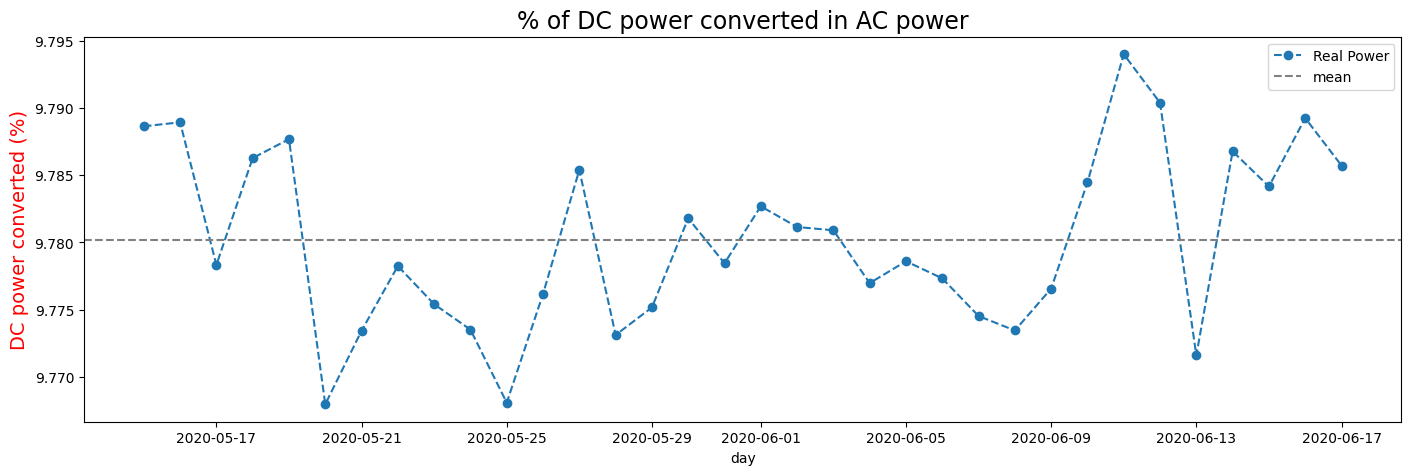

In [ ]:
# % of DC power converted in AC power
losses_1 = df_1_Generation.copy()
losses_1['day'] = losses_1['DATE_TIME'].dt.date
losses_1 = losses_1.groupby('day').sum(numeric_only=True)
losses_1['losses'] = losses_1['AC_POWER'] / losses_1['DC_POWER'] * 100

plt.figure(figsize=(17, 5))
losses_1['losses'].plot(style='o--', label='Real Power')
plt.title('% of DC power converted in AC power', size=17)
plt.ylabel('DC power converted (%)', fontsize=14, color='red')
plt.axhline(losses_1['losses'].mean(), linestyle='--', color='gray', label='mean')
plt.legend()
plt.show()

Correlation between different columns

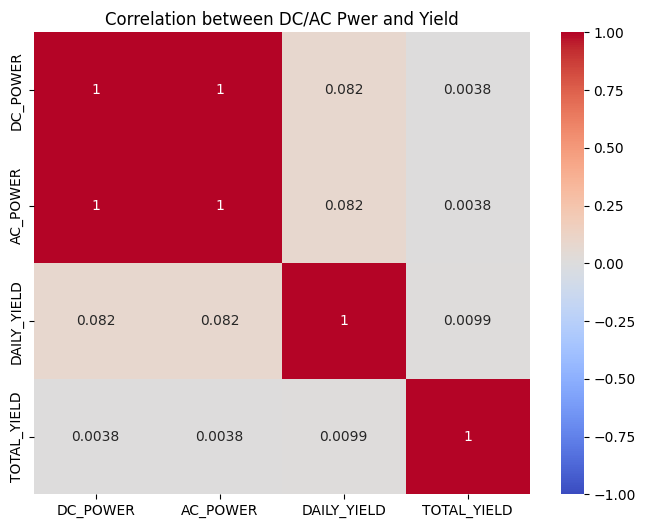

In [ ]:
correlation = df_1_Generation[['DC_POWER',	'AC_POWER',	'DAILY_YIELD',	'TOTAL_YIELD']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, cmap="coolwarm", annot=True, vmin=-1, vmax=1)
plt.title('Correlation between DC/AC Pwer and Yield')
plt.show()

## Weather Analysis

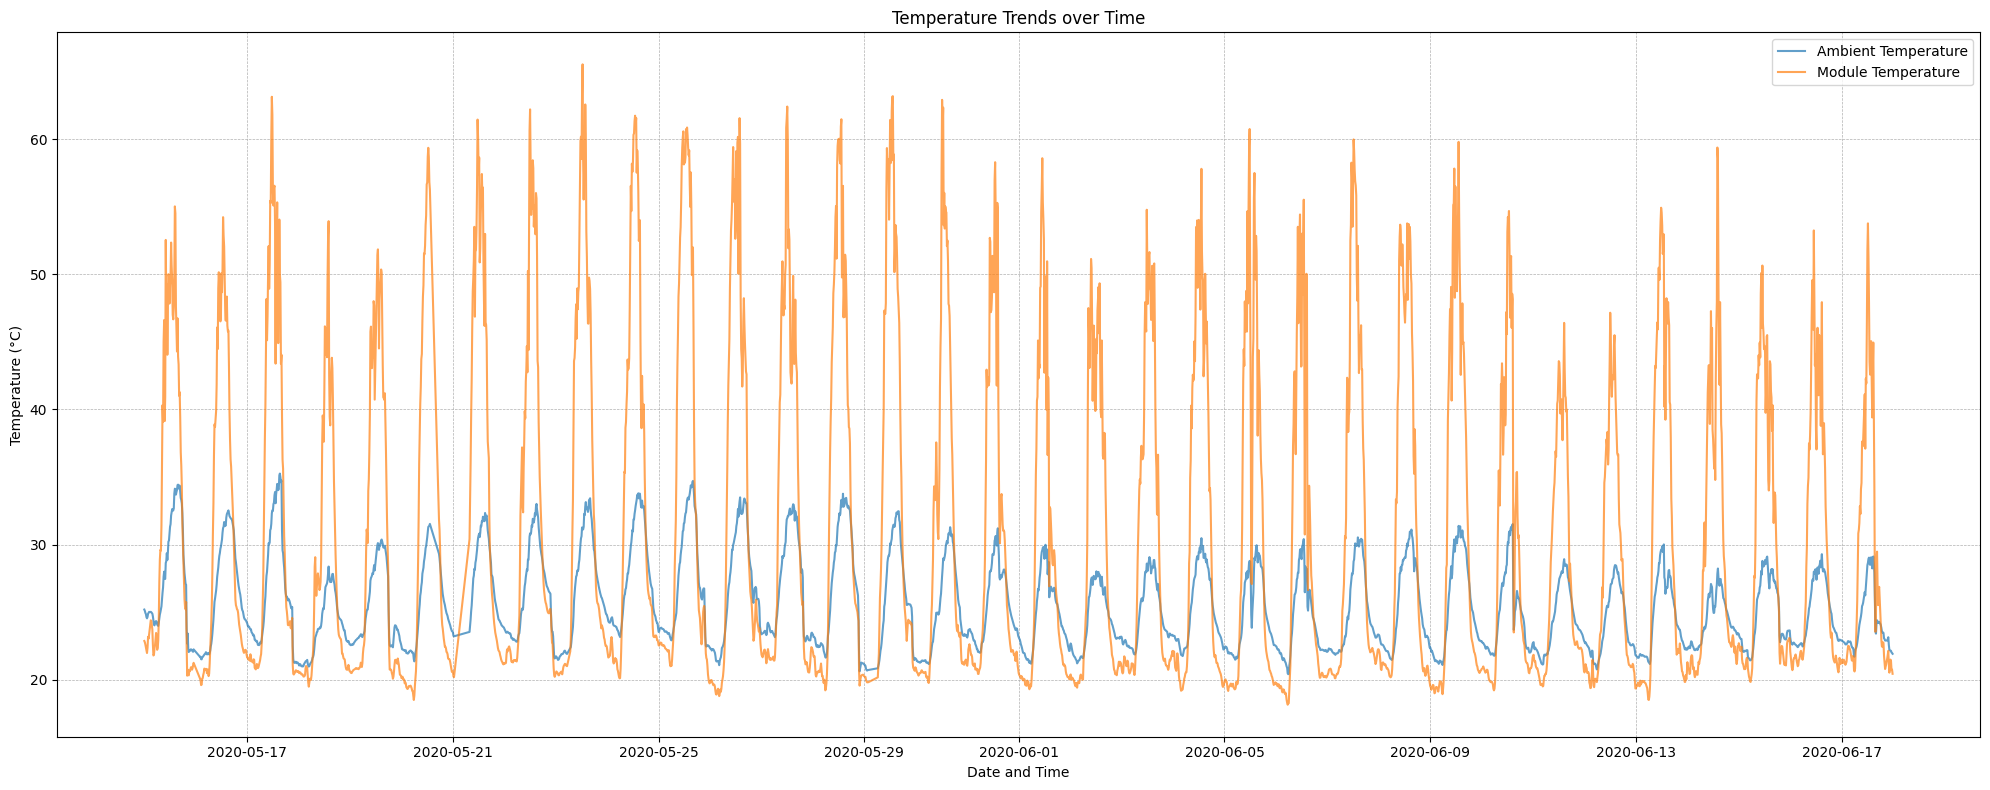

In [ ]:
# Temperature Over Time
plt.figure(figsize=(20,8))
plt.plot(df_1_Weather['DATE_TIME'], df_1_Weather['AMBIENT_TEMPERATURE'], label='Ambient Temperature', alpha=0.7)
plt.plot(df_1_Weather['DATE_TIME'], df_1_Weather['MODULE_TEMPERATURE'], label='Module Temperature', alpha=0.7)
plt.title('Temperature Trends over Time')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

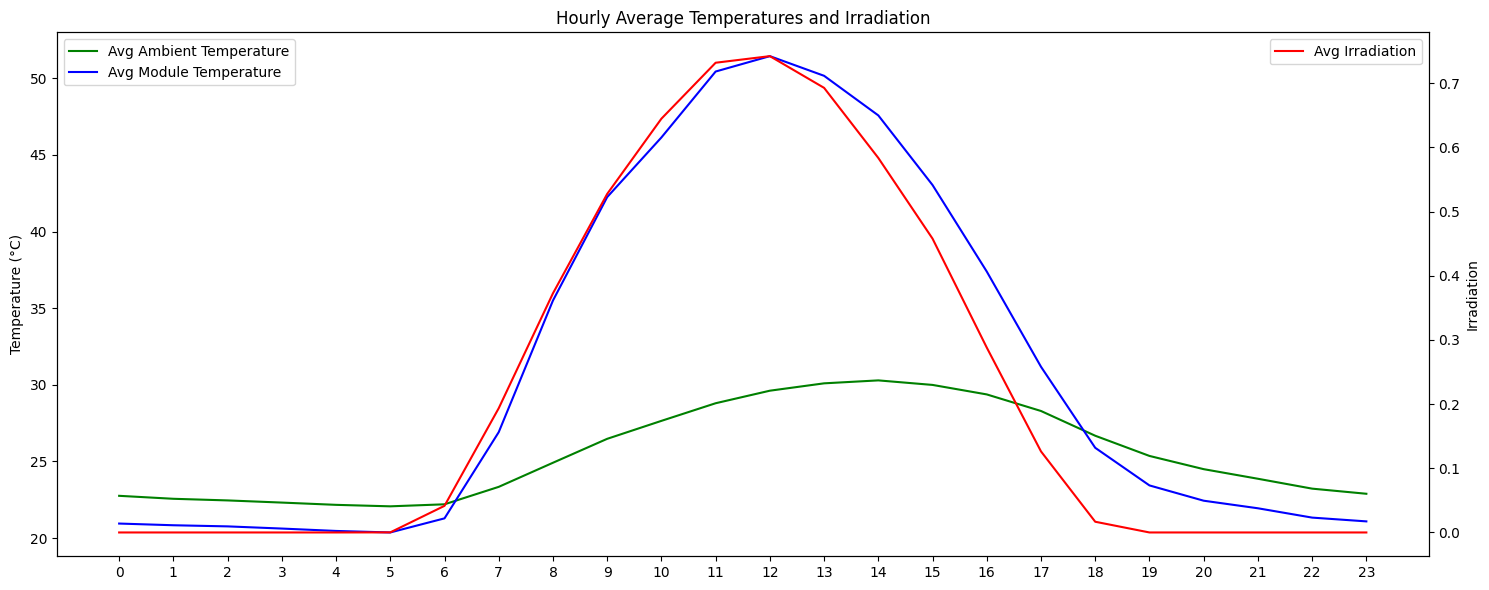

In [ ]:
# Average Hourly Temperature and Irradiation

df_1_Weather['HOUR'] = df_1_Weather['DATE_TIME'].dt.hour

hourly_avg = df_1_Weather.groupby('HOUR').mean(numeric_only=True)

fig, ax1 = plt.subplots(figsize=(15, 6))

ax2 = ax1.twinx()

ax1.plot(hourly_avg.index, hourly_avg['AMBIENT_TEMPERATURE'], 'g-', label='Avg Ambient Temperature')
ax1.plot(hourly_avg.index, hourly_avg['MODULE_TEMPERATURE'], 'b-', label='Avg Module Temperature')
ax2.plot(hourly_avg.index, hourly_avg['IRRADIATION'], 'r-', label='Avg Irradiation')

ax1.set_ylabel('Temperature (°C)', color='black')
ax2.set_ylabel('Irradiation', color='black')

plt.title('Hourly Average Temperatures and Irradiation')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xticks(range(0, 24))
fig.tight_layout()

plt.show()

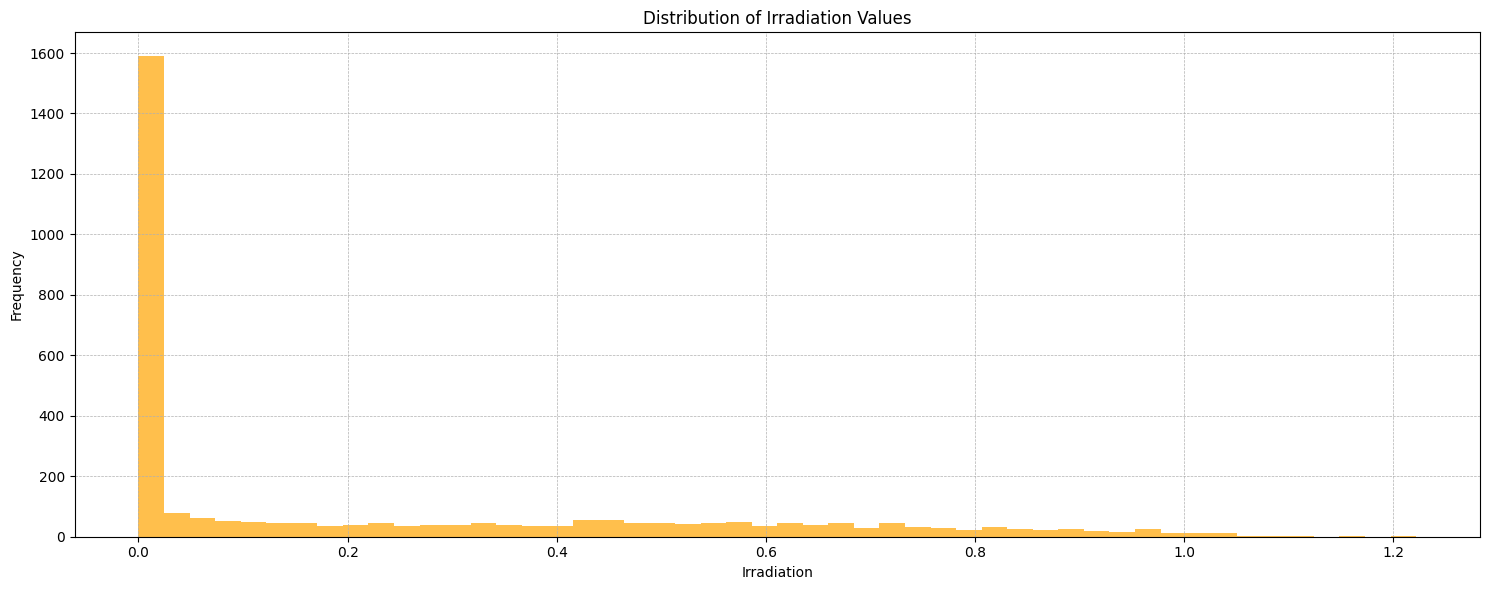

In [ ]:
# Distribution of Irradiation Values
plt.figure(figsize=(15, 6))
plt.hist(df_1_Weather['IRRADIATION'], bins=50, color='orange', alpha=0.7)
plt.title('Distribution of Irradiation Values')
plt.xlabel('Irradiation')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

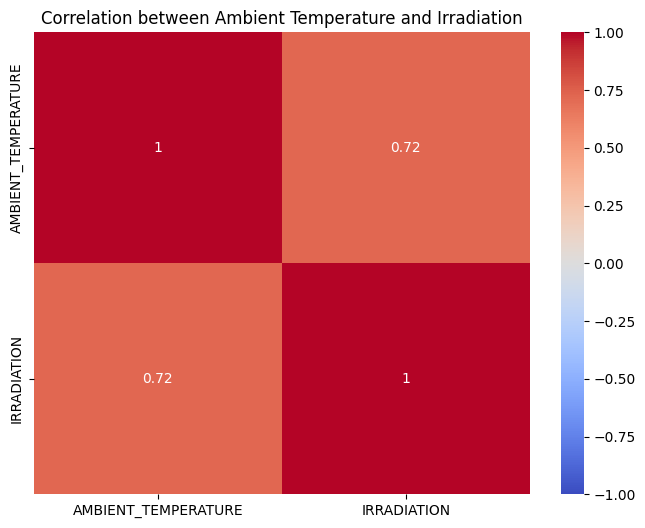

In [ ]:
# Correlation between Ambient Temperature and Irradiation
correlation = df_1_Weather[['AMBIENT_TEMPERATURE', 'IRRADIATION']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, cmap="coolwarm", annot=True, vmin=-1, vmax=1)
plt.title('Correlation between Ambient Temperature and Irradiation')
plt.show()

In [ ]:
print(df_1_Weather['DATE_TIME'].dt.hour.unique())
print(df_1_Weather['DATE_TIME'].dt.month.unique())
print(df_1_Weather['DATE_TIME'].dt.year.unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[5 6]
[2020]


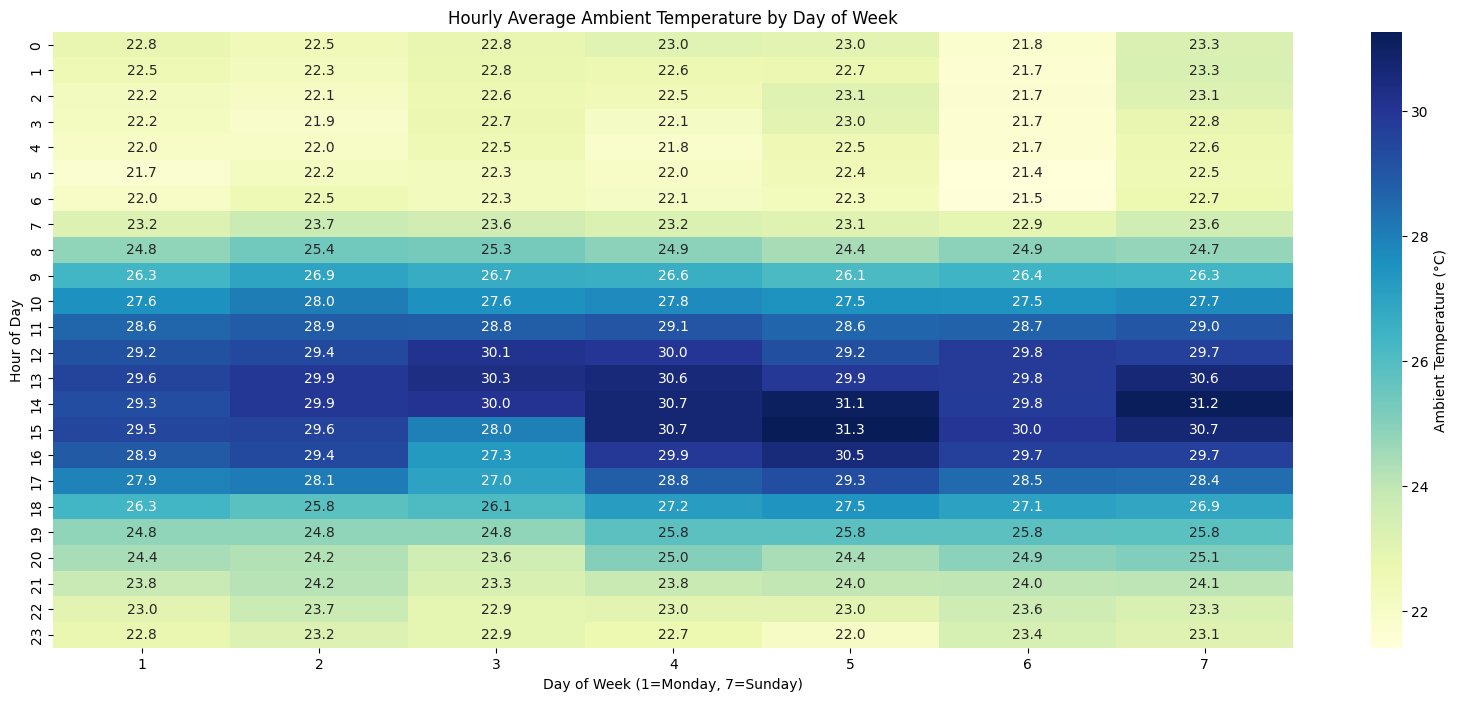

In [ ]:
# Hourly Average Ambient Temperature by Day of Week
df_1_Weather['DAY_OF_WEEK'] = df_1_Weather['DATE_TIME'].dt.dayofweek + 1

pivot_temp = df_1_Weather.groupby(['HOUR', 'DAY_OF_WEEK'])['AMBIENT_TEMPERATURE'].mean().unstack()

plt.figure(figsize=(20, 8))
sns.heatmap(pivot_temp, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Ambient Temperature (°C)'})
plt.title('Hourly Average Ambient Temperature by Day of Week')
plt.xlabel('Day of Week (1=Monday, 7=Sunday)')
plt.ylabel('Hour of Day')
plt.show()

Correlation Between Temperature and Irradiation

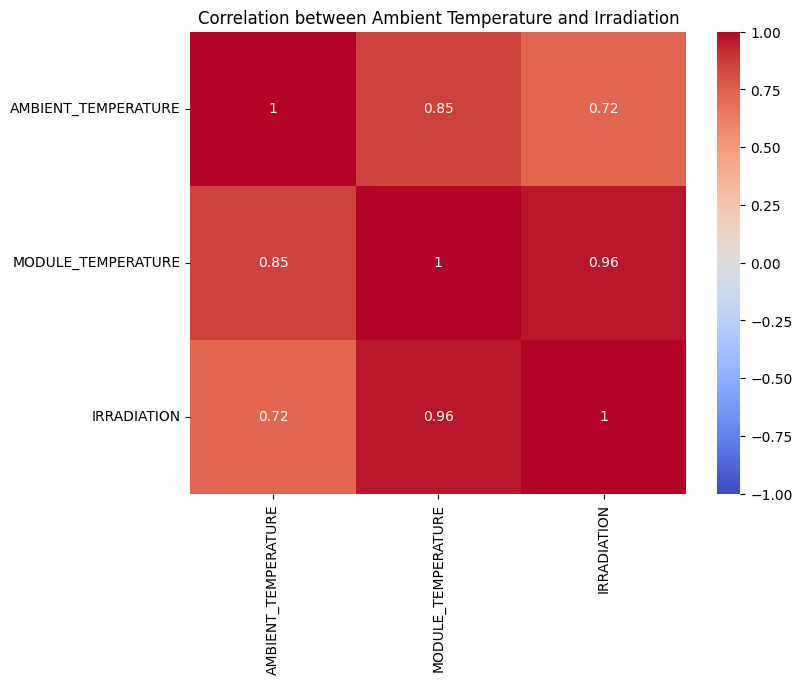

In [ ]:
correlation = df_1_Weather[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, cmap="coolwarm", annot=True, vmin=-1, vmax=1)
plt.title('Correlation between Ambient Temperature and Irradiation')
plt.show()

In [ ]:
# Daistr
import plotly.express as px

import plotly.graph_objects as go

fig = go.Figure()

df_gen = df_amb_irr = df_1_Weather.groupby(['AMBIENT_TEMPERATURE']).mean(numeric_only=True).reset_index()


fig.add_trace(go.Scatter(
    x=df_gen['AMBIENT_TEMPERATURE'],
    y=df_gen['IRRADIATION'],
    mode='lines+markers',
    name='IRRADIATION',
    line=dict(color='darkblue', width=3),
    marker=dict(size=8, color=df_gen['IRRADIATION'], colorscale='Viridis', showscale=True),
    fill='tozeroy',
    fillcolor='rgba(100, 150, 250, 0.1)'
))

fig.update_layout(
    plot_bgcolor="white",
    title={
        'text': "IRRADIATION",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="AMBIENT_TEMPERATURE",
    yaxis_title="IRRADIATION",
    title_font=dict(size=26, family="Arial", color="black"),
    xaxis_title_font=dict(size=20, family="Arial", color="grey"),
    yaxis_title_font=dict(size=20, family="Arial", color="grey"),
    xaxis_tickfont=dict(size=14, family="Arial", color="grey"),
    yaxis_tickfont=dict(size=14, family="Arial", color="grey"),
    hovermode="x",
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Arial"),
    xaxis=dict(tickangle=-45, nticks=20),
    yaxis=dict(gridcolor="lightgrey")
)

fig.show()